In [100]:
symbols = ["NSE:SIEMENS-EQ", "BSE:SIEMENS-A"]

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy as sp
import yfinance as yf
import statsmodels.tsa.stattools
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import norm

app_name = 'trader_bot_1'
app_id = 'HMNTZU1772-100'
secret_id = 'E5A2614XVJ'

# Import the required module from the fyers_apiv3 package
from fyers_apiv3 import fyersModel

# Replace these values with your actual API credentials
client_id = app_id
secret_key = secret_id
redirect_uri = "https://www.google.com/"
response_type = "code"  
state = "iamatrader"

# Create a session model with the provided credentials
session = fyersModel.SessionModel(
    client_id=client_id,
    secret_key=secret_key,
    redirect_uri=redirect_uri,
    response_type=response_type,
    state = state
)

# Generate the auth code using the session model
response = session.generate_authcode()

# Print the auth code received in the response
print(response)

https://api-t1.fyers.in/api/v3/generate-authcode?client_id=HMNTZU1772-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=iamatrader


In [13]:
# Extract the auth_code embedded in the Google url obtained by redirecting via the above result
auth_code = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE3MTc1NTk1NjMsImV4cCI6MTcxNzU4OTU2MywibmJmIjoxNzE3NTU4OTYzLCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYUzg1NDM1Iiwib21zIjoiSzEiLCJoc21fa2V5IjoiMzk4MWY0MjNmMGJkZWI3ZTM3M2FlY2M0YmRmOWVjZTc0ODJiYjA0NzhkOGJlNDNmZmYwMDQ3MGUiLCJub25jZSI6IiIsImFwcF9pZCI6IkhNTlRaVTE3NzIiLCJ1dWlkIjoiNTBhNzU2NTQzZjVmNDM1NmI5NGRjZGFmOTUwZmJjZWIiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.dv-eETKxrJ263ywn34Nevs6tMl1ghF8YzZkJ08depmU"

In [14]:
response_type = "code"
grant_type = "authorization_code"  

# Create a session object to handle the Fyers API authentication and token generation
session = fyersModel.SessionModel(
    client_id=client_id,
    secret_key=secret_key, 
    redirect_uri=redirect_uri, 
    response_type=response_type, 
    grant_type=grant_type
)

# Set the authorization code in the session object
session.set_token(auth_code)

# Generate the access token using the authorization code
response = session.generate_token()

# Extract the access token and refresh token
access_token = response["access_token"]
refresh_token = response["refresh_token"]

# Print the response, which should contain the access token and other details
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTc1NTk1ODgsImV4cCI6MTcxNzYzMzgwOCwibmJmIjoxNzE3NTU5NTg4LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVgtRWs2c1pUdFJrekozam1YUVEzQVhBUnNzd3FRMzZ5ZFE1aUlLNk8tZFVpZEpnMjBDZkplR2MyRkxRZ2xjdWNFTU9zZjEyQ2FIYjFIcEs0MXNxbVRPT1A0RkRWV2I0cGV6U1hBLTZYX1VPS0w1RT0iLCJkaXNwbGF5X25hbWUiOiJTSURESEFSVEhBICBSQUpFRVYiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzOTgxZjQyM2YwYmRlYjdlMzczYWVjYzRiZGY5ZWNlNzQ4MmJiMDQ3OGQ4YmU0M2ZmZjAwNDcwZSIsImZ5X2lkIjoiWFM4NTQzNSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.nrBmWwa-tnCYXveuvtuCTciLpOMoN7nILcF_Oqh5dAY', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTc1NTk1ODgsImV4cCI6MTcxODg0MzQwOCwibmJmIjoxNzE3NTU5NTg4LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQUFBQ

In [16]:
import os

# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path=os.getcwd())

# Make a request to get the user profile information
response = fyers.get_profile()
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'data': {'fy_id': 'XS85435', 'name': 'SIDDHARTHA  RAJEEV', 'image': None, 'display_name': None, 'pin_change_date': '01-06-2024 23:32:35', 'email_id': 'sidsr003@gmail.com', 'pwd_change_date': None, 'PAN': '---------', 'mobile_number': '7619527676', 'totp': False, 'pwd_to_expire': 90}}


     NSE:SIEMENS-EQ  BSE:SIEMENS-A
0           6541.85        6558.95
1           6533.00        6544.60
2           6529.80        6525.40
3           6516.25        6518.95
4           6444.45        6449.75
..              ...            ...
135         6490.00        6498.40
136         6483.00        6475.90
137         6471.00        6470.00
138         6480.00        6475.60
139         6500.00        6484.90

[140 rows x 2 columns]


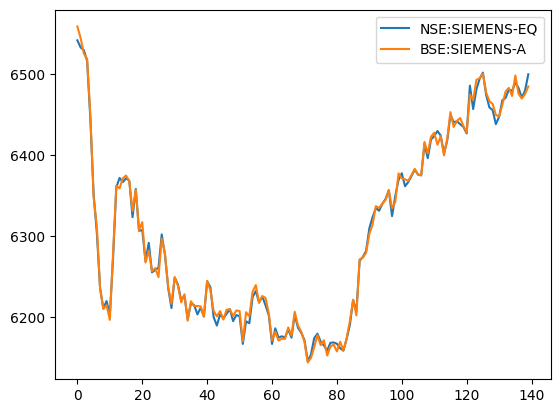

In [211]:
import pandas as pd
import datetime as dt

# Retrieve data


def get_data():

    data = pd.DataFrame()

    start_date = dt.date.today()-dt.timedelta(0)
    end_date = dt.date.today()-dt.timedelta(0)


    def retrieve_batch(query_data):
        response = fyers.history(data=query_data)
        temp_data = pd.DataFrame(response['candles'])
        temp_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
        temp_data['Date'] = pd.to_datetime(temp_data['Date'], unit='s')
        temp_data.Date = temp_data.Date.dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
        temp_data['Date'] = temp_data['Date'].dt.tz_localize(None)
        return temp_data

    for symbol in symbols:
        symbol_data = pd.DataFrame(columns=['Date', symbol])
        query_data = {
            "symbol":symbol,
            "resolution":"1",
            "date_format":"1",
            "range_from":start_date,
            "range_to": end_date,
            "cont_flag":"1"
        }
        while(start_date+dt.timedelta(100) <= end_date):
            temp_date = start_date + dt.timedelta(100)
            query_data['range_to'] = temp_date
            temp_data = retrieve_batch(query_data)
            symbol_data = pd.concat([symbol_data, temp_data], axis=0)
            start_date = temp_date + dt.timedelta(1)
        query_data['range_to'] = end_date
        temp_data = retrieve_batch(query_data)
        symbol_data['Date'] = temp_data['Date']
        symbol_data[symbol] = temp_data['Close']
        data = pd.concat([data, symbol_data], axis=1)
        data.drop(['Date'], inplace=True, axis=1)

    return data

data = get_data()
data.plot()
print(data)
data = data[:]

In [50]:
# Defined based on NSE transactions

def get_regulatory_costs(side, price, quantity):
    flow = price*quantity
    brokerage = min(3*(1e-4)*flow, 20)
    stt_ctt = 0
    stamp_charges = 0
    if side == -1:
        stt_ctt = 2.5*(1e-4)*flow
        stamp_charges = 0
    elif side == 1:
        stt_ctt = 0
        stamp_charges = 3*(1e-5)*flow
    transaction_charges = 3.22*(1e-5)*flow
    sebi_charges = (1e-6)*flow
    gst = 0.18*(brokerage+transaction_charges+sebi_charges)
    total = brokerage + stt_ctt + transaction_charges + gst + sebi_charges + stamp_charges
    return total

In [172]:
def place_pair_market_order(assets, quantity, side):

    data = {
        "symbol":assets[0],
        "qty":quantity[0],
        "type":2,
        "side":side[0],
        "productType":"INTRADAY",
        "limitPrice":0,
        "stopPrice":0,
        "validity":"DAY",
        "disclosedQty":0,
        "offlineOrder":False,
    }

    response = fyers.place_order(data=data)
    print(response)

    data = {
        "symbol":assets[1],
        "qty":quantity[1],
        "type":2,
        "side":side[1],
        "productType":"INTRADAY",
        "limitPrice":0,
        "stopPrice":0,
        "validity":"DAY",
        "disclosedQty":0,
        "offlineOrder":False,
    }
    response = fyers.place_order(data=data)
    print(response)

In [162]:
# def place_pair_market_order(a, b, c):
#     print(f"Placed {c[0]} order for {a[0]}, units={b[0]}")
#     print(f"Placed {c[1]} order for {a[1]}, units={b[1]}")

In [212]:
# Now we build our backtesting strategy with a rolling window of specified size

# The pair being traded
asset_a = symbols[1]
asset_b = symbols[0]

# the entry and exit z-statistics
z_entry = 2.5
z_exit = 0
window = 200 # the number of look-back days for statistics (not that if this is far too small, then the standard dev will be zero and cause errors because the price may not change for a few time steps)



# information used t0 make the trading decision and signal changes
prev_z_score = 0 
position = 0
signal = 0
z_scores = []
positions = []

# the number of each stock's shares held
shares_a = 0
shares_b = 0
shares_a_history = []
shares_b_history = []

# the total value held
portfolio = 0
portfolio_history = []

min_order = 3 # minimum number of shares that must be bought

hedge_ratios=[] # a list of the ratio of shares of asset_b and asset_a at each timestep

current_prices = None

pairs_data = None

In [213]:
def close_positions():
    global portfolio, shares_a, shares_b, position, current_prices
    if position != 0:
        costs = get_regulatory_costs(-np.sign(shares_b), current_prices[asset_b], abs(shares_b)) + get_regulatory_costs(-np.sign(shares_a), current_prices[asset_a], abs(shares_a))
        portfolio += shares_a*current_prices[asset_a] + shares_b*current_prices[asset_b] - costs
        place_pair_market_order([asset_a,asset_b], [abs(shares_a), abs(shares_b)], [-int(np.sign(shares_a)), -int(np.sign(shares_b))])
        shares_a = 0
        shares_b = 0
        position = 0

def execute_trade():
    global asset_a, asset_b, z_entry, z_exit, prev_z_score, position, positions, shares_a, shares_b, shares_a_history, shares_b_history, portfolio, portfolio_history, min_order, hedge_ratios, current_prices, pairs_data

    # store the prices in a new data frame
    pairs_data = data[[asset_a, asset_b]]

    moving_model = sm.OLS(pairs_data.iloc[-window-1:-1][asset_b], sm.add_constant(pairs_data.iloc[-window-1:-1][asset_a], has_constant='add')).fit() # perform OLS linear regression on the standardized asset prices 
    moving_beta_0 = moving_model.params[0] # intercept
    moving_beta_1 = moving_model.params[1] # slope

    moving_spread = np.array(pairs_data.iloc[-window-1:-1][asset_b])-moving_beta_1*np.array(pairs_data.iloc[-window-1:-1][asset_a])-moving_beta_0 # compute moving spread
    moving_model = AutoReg(moving_spread, lags=1, trend='n', seasonal=False, exog=np.ones(len(moving_spread))).fit() # fit an autoregression to the window of spread data
    moving_alpha = moving_model.params[1] # constant
    moving_beta = moving_model.params[0] # lag=1 coefficient

    moving_mu = -np.log(moving_beta) # window's mu for OU process
    moving_theta = moving_alpha/(1-moving_beta) # window's theta for OU process
    moving_sigma = np.std(np.array(moving_spread[1:])-moving_alpha-moving_beta*np.array(moving_spread[:-1]))*np.sqrt(2*moving_mu/(1-moving_beta**2)) # window's sigma for OU process

    current_prices = pairs_data.iloc[-1] # latest prices
    current_spread = current_prices[asset_b]-moving_beta_1*current_prices[asset_a]-moving_beta_0 # latest spread
    z_score = (current_spread-moving_theta)/(moving_sigma/np.sqrt(2*moving_mu)) # latest z-score
    z_scores.append(z_score)

    # Now generate the trading signals
    if prev_z_score < z_entry and z_score > z_entry and position > -1: # if pair is overbought
        close_positions()
        signal = -1
        position = -1
    elif prev_z_score > -z_entry and z_score < -z_entry and position < 1: # if pair is oversold
        close_positions()
        signal = 1 # long the pair
        position = 1
    elif prev_z_score > z_exit and z_score < z_exit: # if exiting the overbought region
        close_positions()
        signal = 0
        position = 0
    elif prev_z_score < -z_exit and z_score > -z_exit: # if exiting the underbought region
        close_positions()
        signal = 0
        position = 0
    else:
        signal = 0

    # Now execute the trades
    hedge_ratio = 1
    if signal != 0:
        shares_a -= signal*min_order # short asset_a for positive delta
        shares_b += hedge_ratio*signal*min_order # long asset_b for positive delta
        costs = get_regulatory_costs(np.sign(signal), current_prices[asset_b], abs(hedge_ratio*signal*min_order)) + get_regulatory_costs(-np.sign(signal), current_prices[asset_a], abs(signal*min_order))
        portfolio -= (hedge_ratio*signal*min_order*current_prices[asset_b] - signal*min_order*current_prices[asset_a]) # update portfolio according to shares bought and sold
        place_pair_market_order([asset_a,asset_b], [abs(signal*min_order), abs(hedge_ratio*signal*min_order)], [-int(np.sign(signal)), int(np.sign(signal))])

    # update z_score 
    prev_z_score = z_score

    shares_a_history.append(shares_a)
    shares_b_history.append(shares_b)
    positions.append(position)
    portfolio_history.append(portfolio)
    hedge_ratios.append(hedge_ratio)

In [214]:
iterations = 30

for i in range(iterations):
    data = get_data()
    execute_trade()

# close all positions
close_positions()

shares_a_history.append(shares_a)
shares_b_history.append(shares_b)
portfolio_history.append(portfolio)
positions.append(position)

# convert to numpy arrays for convenience
z_scores = np.array(z_scores)
positions = np.array(positions)
portfolio_history = np.array(portfolio_history)
hedge_ratios = np.array(hedge_ratios)


{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302186'}
{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302191'}
{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302200'}
{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302208'}
{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302337'}
{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302342'}
{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302346'}
{'code': 1101, 'message': 'Successfully placed order', 's': 'ok', 'id': '24060500302349'}


C:\Users\sidsr\AppData\Local\Temp\ipykernel_11588\3998966963.py:46: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[3].set_ylim([np.min(hedge_ratios), np.max(hedge_ratios)])


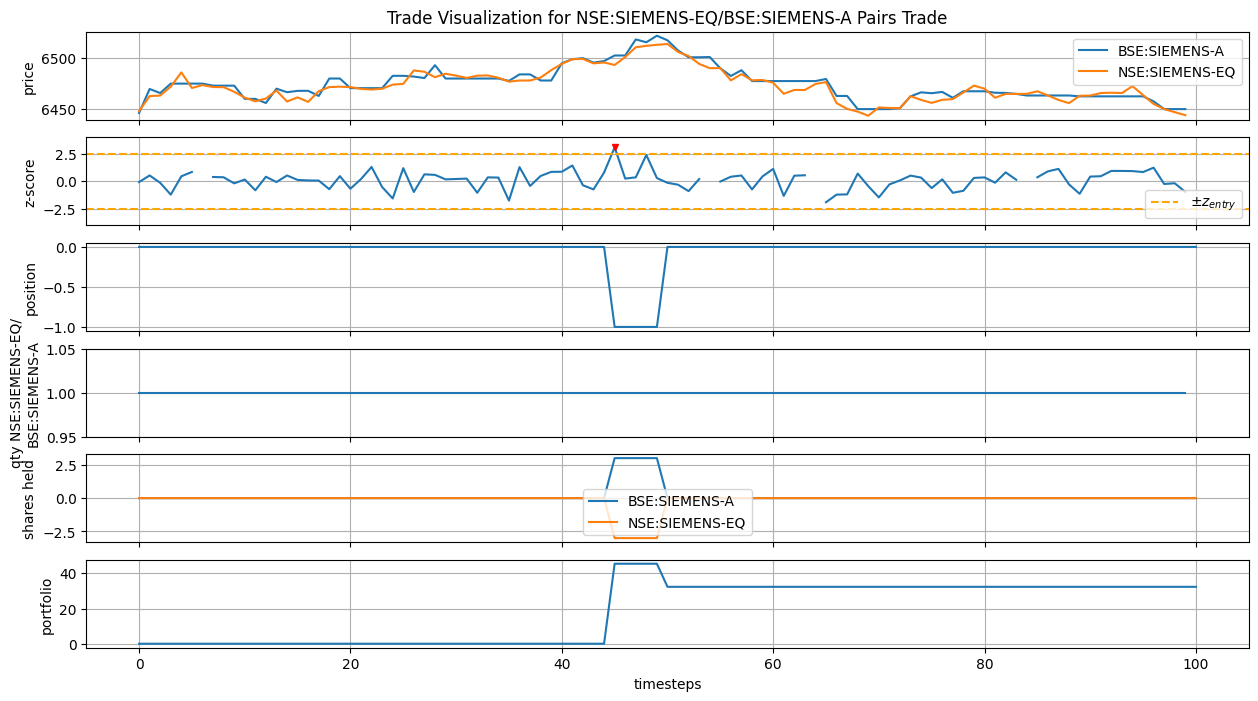

profit = 32.325368576398546


<Figure size 640x480 with 0 Axes>

In [210]:
# Generate the trading signal triangles based on when the trading signal changes to +1 or -1
buy_signals = []
sell_signals = []

if positions[0] == 1:
    buy_signals.append(0)
elif positions[0] == -1:
    sell_signals.append(0)
for i in range(1, len(positions)):
    if positions[i] == 1 and positions[i-1] < 1:
        buy_signals.append(i)
    if positions[i] == -1 and positions[i-1] > -1:
        sell_signals.append(i)
buy_signals = np.array(buy_signals)
sell_signals = np.array(sell_signals)

# Visualise the trade

fig, axs = plt.subplots(nrows = 6, ncols = 1, figsize=(15, 8), sharex=True)

axs[0].plot(np.array(pairs_data.iloc[-iterations:][asset_a]), label=f'{asset_a}')
axs[0].plot(np.array(pairs_data.iloc[-iterations:][asset_b]), label=f'{asset_b}')
axs[0].set_ylabel('price')
axs[0].set_title(f"Trade Visualization for {asset_b}/{asset_a} Pairs Trade")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(z_scores)
if buy_signals.shape[0]>0:
    axs[1].plot(buy_signals, z_scores[buy_signals], marker='^', c='green', ls='', markersize=4)
if sell_signals.shape[0]>0:
    axs[1].plot(sell_signals, z_scores[sell_signals], marker='v', c='red', ls='', markersize=4)
axs[1].axhline(z_entry, c='orange', ls='--', label='$\pm z_{entry}$')
axs[1].axhline(-z_entry, c='orange', ls='--')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('z-score')
axs[1].set_ylim([-4, 4])
axs[1].grid(True)

axs[2].plot(positions)
axs[2].set_ylabel('position')
axs[2].grid(True)

axs[3].plot(hedge_ratios)
axs[3].set_ylabel(f'qty {asset_b}/\n{asset_a}')
axs[3].set_ylim([np.min(hedge_ratios), np.max(hedge_ratios)])
axs[3].grid(True)

axs[4].plot(shares_a_history, label=asset_a)
axs[4].plot(shares_b_history, label=asset_b)
axs[4].grid(True)
axs[4].set_ylabel('shares held')
axs[4].legend()

axs[5].plot(portfolio_history)
axs[5].set_ylabel('portfolio')
axs[5].grid(True)
axs[5].set_xlabel('timesteps')

plt.show()
plt.tight_layout()

print(f"profit = {portfolio_history[-1]}")

In [219]:
for i in range(len(hedge_ratios)):
    if positions[i] < 0:
        print(np.array(pairs_data.iloc[-iterations:][asset_a])[i])

6477.5
6450.15
